In [1]:
import pandas as pd
countries = pd.read_csv("countries.csv") 
flavors = pd.read_csv("flavours (redacted).csv")
products = pd.read_csv("products.csv")
countries.columns = ['c_id',  'name', 'region']
products.columns = ['p_id', 'c_id', 'supercat', 'cat', 'sub', 'date']
flavors.columns = ['p_id', 'b_n', 'f_id','f_cat']

## 1. countries

In [2]:
display(countries.head())
countries.info()

,c_id,name,region
0,KH,Cambodia,Asia Pacific
1,TN,Tunisia,Middle East & Africa
2,NZ,New Zealand,Asia Pacific
3,DE,Germany,Europe
4,EE,Estonia,Europe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c_id    86 non-null     object
 1   name    86 non-null     object
 2   region  86 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [3]:
countries['region'].value_counts()
# countries.c_id.nunique()

region
Europe                  32
Asia Pacific            20
Middle East & Africa    20
Latin America           12
North America            2
Name: count, dtype: int64

## 2. products 

In [4]:
display(products.head())
products['date'] = pd.to_datetime(products['date'], errors='coerce')
products.describe()
products.info()

products.p_id.nunique()

,p_id,c_id,supercat,cat,sub,date
0,6833101,CN,Food,Sugar & Gum Confectionery,Other Sugar Confectionery,2016-11-25
1,9319733,PH,Food,Bakery,"Cakes, Pastries & Sweet Goods",2018-10-31
2,11789985,GB,Food,"Processed Fish, Meat & Egg Products",Poultry Products,2019-12-18
3,6707921,CL,Food,Dairy,Soft Cheese & Semi-Soft Cheese,2016-10-27
4,15866682,CZ,Food,Chocolate Confectionery,Seasonal Chocolate,2023-03-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281370 entries, 0 to 2281369
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   p_id      int64         
 1   c_id      object        
 2   supercat  object        
 3   cat       object        
 4   sub       object        
 5   date      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 104.4+ MB


2281370

### num_prod by supercat and cat

In [5]:
import matplotlib.pyplot as plt
# products.groupby('cat')['p_id'].count().reset_index()
x = products.groupby('supercat')['p_id'].count().reset_index()
print(x)
# products.groupby('supercat')['cat'].nunique()
products.groupby(['supercat','cat'])['p_id'].count().reset_index().sort_values(['supercat','p_id'], ascending=[True,False]) 

  supercat     p_id
0    Drink   402332
1     Food  1879038


,supercat,cat,p_id
2,Drink,Hot Beverages,104300
0,Drink,Alcoholic Beverages,101137
3,Drink,Juice Drinks,68275
4,Drink,Nutritional Drinks & Other Beverages,42499
1,Drink,Carbonated Soft Drinks,30867
5,Drink,RTDs,23519
7,Drink,Water,18941
6,Drink,Sports & Energy Drinks,12794
9,Food,Bakery,294261
20,Food,Snacks,252863


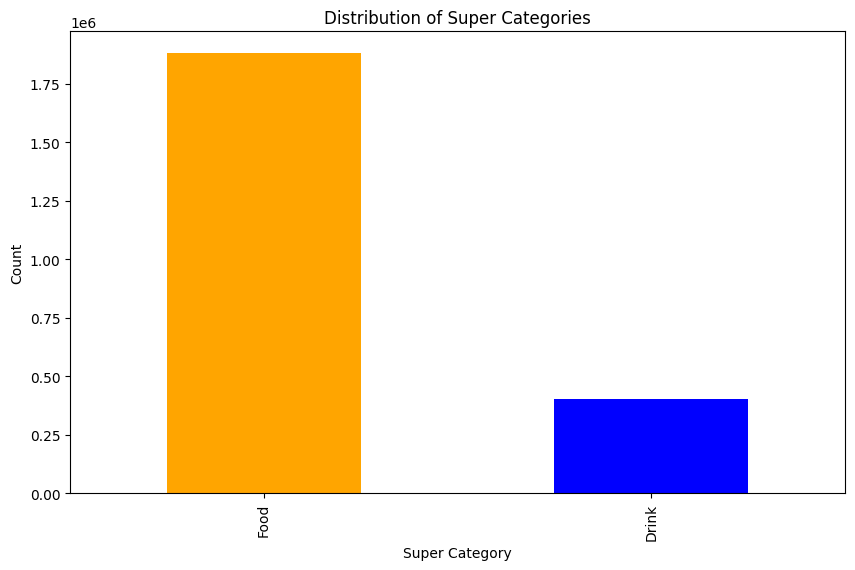

In [6]:
# Count the distribution of high-level product categories (e.g., Food, Drink)
products['supercat'].value_counts().plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'], title='Distribution of Super Categories')
plt.xlabel('Super Category')
plt.ylabel('Count')
plt.show()


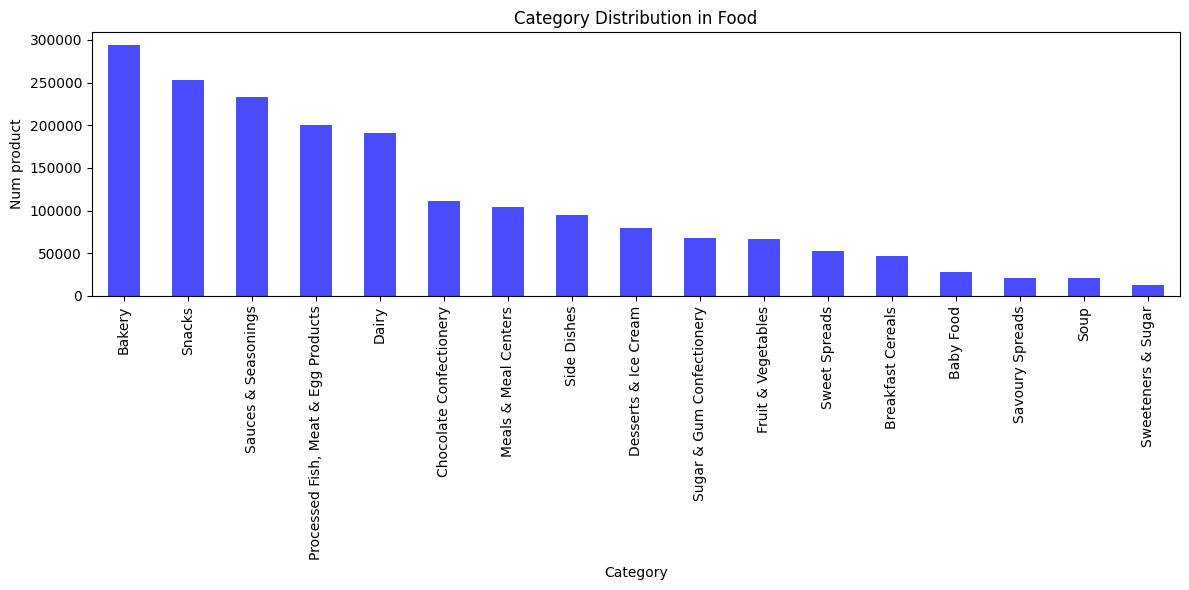

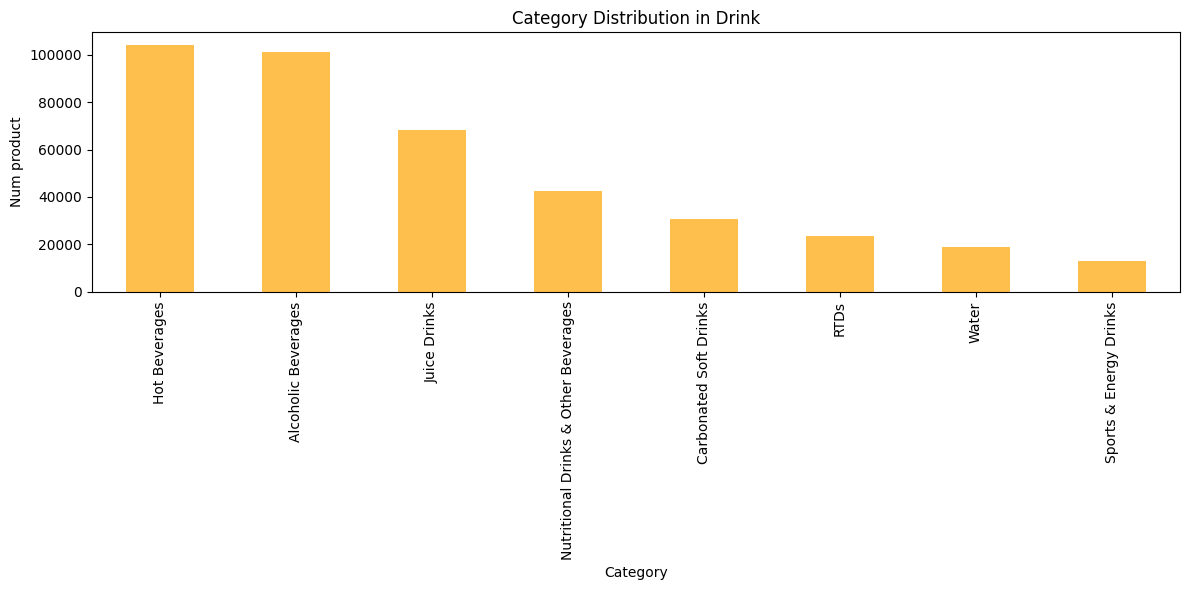

In [7]:
import matplotlib.pyplot as plt
# Choose two super categories to compare
supercat1 = 'Food'  # Example
supercat2 = 'Drink'  # Example

# Filter the data for these two super categories
data_supercat1 = products[products['supercat'] == supercat1]
data_supercat2 = products[products['supercat'] == supercat2]
# Count occurrences of each category in supercat1
cat_counts_supercat1 = data_supercat1['cat'].value_counts()

# Plot the distribution of categories in supercat1
plt.figure(figsize=(12, 6))
cat_counts_supercat1.plot(kind='bar', color='blue', alpha=0.7)
plt.title(f'Category Distribution in {supercat1}')
plt.xlabel('Category')
plt.ylabel('Num product')
plt.xticks()
plt.tight_layout()
plt.show()

# Count occurrences of each category in supercat2
cat_counts_supercat2 = data_supercat2['cat'].value_counts()

# Plot the distribution of categories in supercat2
plt.figure(figsize=(12, 6))
cat_counts_supercat2.plot(kind='bar', color='orange', alpha=0.7)
plt.title(f'Category Distribution in {supercat2}')
plt.xlabel('Category')
plt.ylabel('Num product')
plt.xticks()
plt.tight_layout()
plt.show()


### num_prod by datetime

In [8]:
import plotly.express as px

products['month'] = products['date'].dt.month
# Filter the data for 'Food' super category
food_data = products[products['supercat'] == 'Food']
# Group by month and category to get the count of products for each combination
food_year_cat_counts = food_data.groupby(['month', 'cat'])['p_id'].count().reset_index()

# Pivot the data to have months as rows and categories as columns
food_year_cat_pivot = food_year_cat_counts.pivot(index='month', columns='cat', values='p_id').fillna(0)

# Convert the pivot table to a long format for Plotly
food_year_cat_long = food_year_cat_pivot.reset_index().melt(id_vars='month', var_name='Category', value_name='Number of Products')

# Create an interactive line plot for 'Food'
fig_food = px.line(food_year_cat_long, x='month', y='Number of Products', color='Category', title='Trend of Number of Food Products for Each Category Over Month')

# Update layout for better visualization
fig_food.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Products',
    legend_title='Category',
    hovermode='x unified'
)

# Show the plot for 'Food'
fig_food.show()

# Filter the data for 'Drink' super category
drink_data = products[products['supercat'] == 'Drink']
# Group by month and category to get the count of products for each combination
drink_year_cat_counts = drink_data.groupby(['month', 'cat'])['p_id'].count().reset_index()

# Pivot the data to have months as rows and categories as columns
drink_year_cat_pivot = drink_year_cat_counts.pivot(index='month', columns='cat', values='p_id').fillna(0)

# Convert the pivot table to a long format for Plotly
drink_year_cat_long = drink_year_cat_pivot.reset_index().melt(id_vars='month', var_name='Category', value_name='Number of Products')

# Create an interactive line plot for 'Drink'
fig_drink = px.line(drink_year_cat_long, x='month', y='Number of Products', color='Category', title='Trend of Number of Drink Products for Each Category Over Month')

# Update layout for better visualization
fig_drink.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Products',
    legend_title='Category',
    hovermode='x unified'
)

# Show the plot for 'Drink'
fig_drink.show()

### num_product by region overall

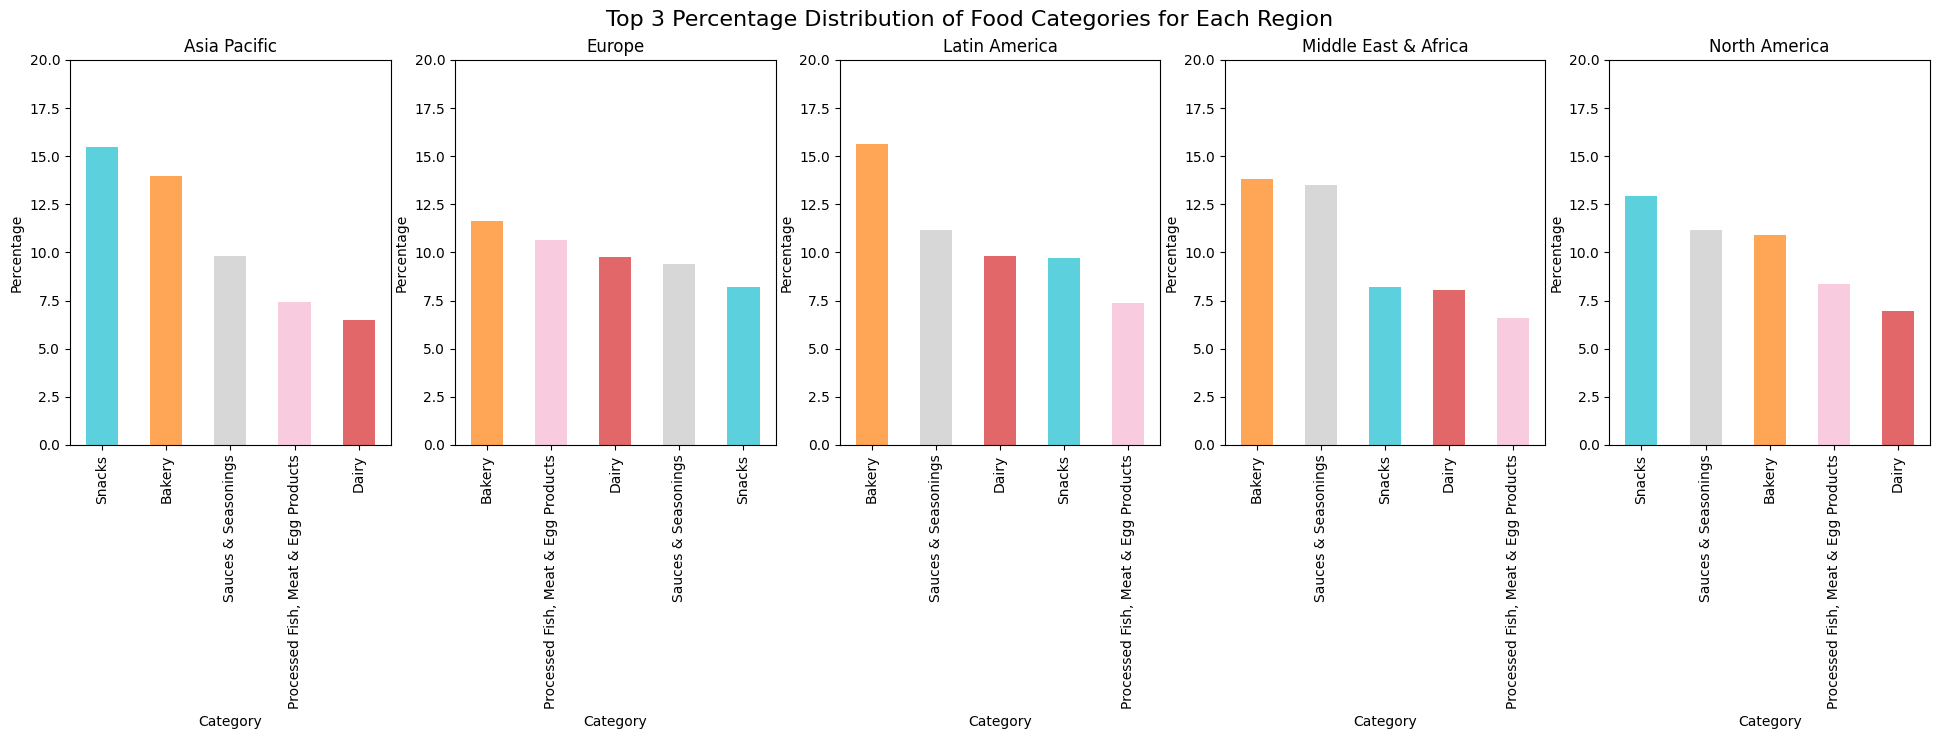

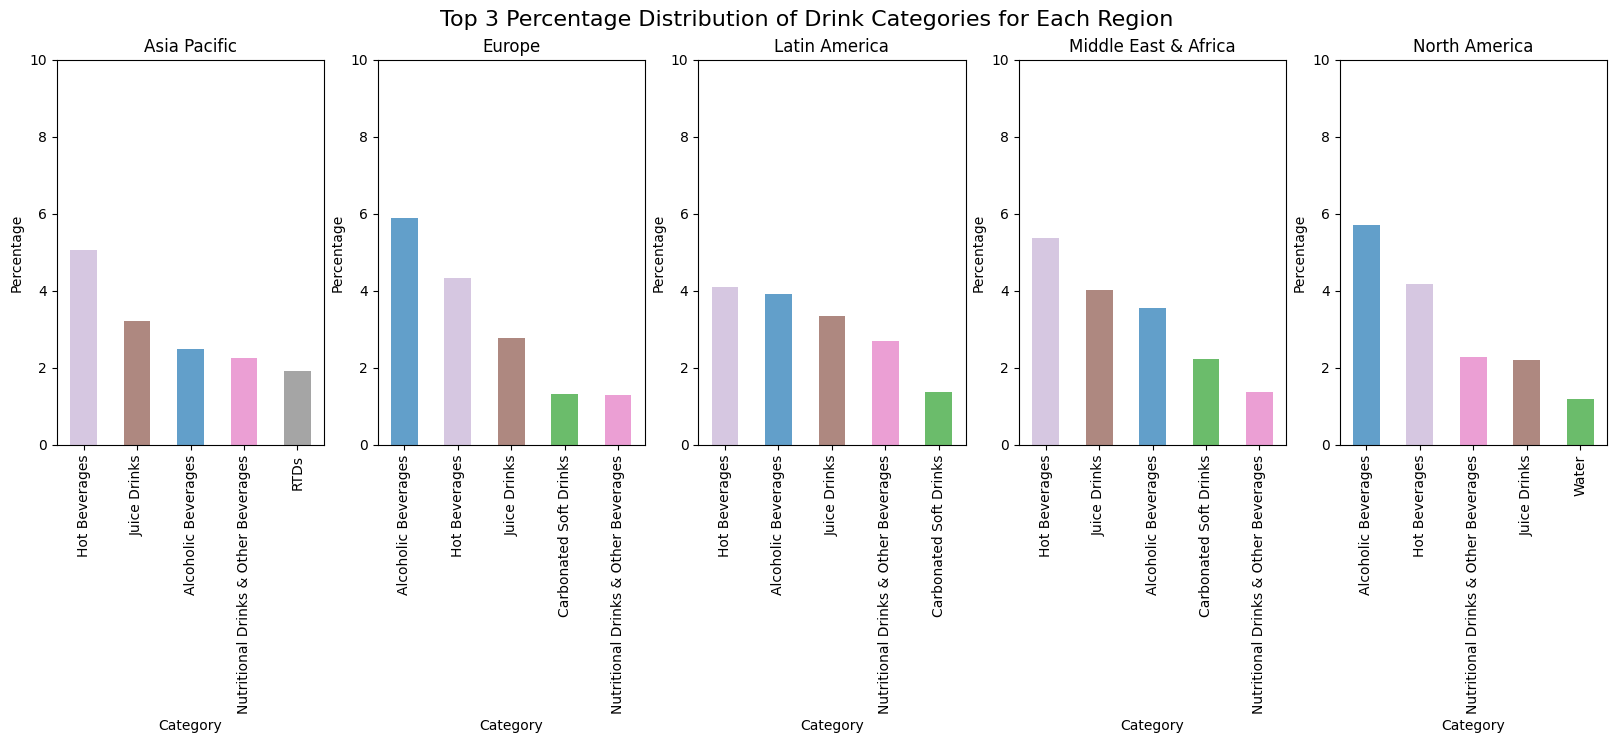

In [9]:
products_with_region = products.merge(countries, on='c_id', how='inner')
# Define the necessary variables
regions = products_with_region['region'].unique()
colors = plt.cm.tab20.colors

# Calculate the percentage of each product category for each region
region_cat_percentage = products_with_region.groupby(['region', 'cat'])['p_id'].count().unstack().fillna(0)
region_cat_percentage = region_cat_percentage.div(region_cat_percentage.sum(axis=1), axis=0) * 100

# Define a color mapping for categories
category_colors = {category: colors[i % len(colors)] for i, category in enumerate(region_cat_percentage.columns)}

# Separate the data for Food and Drink
food_cat_counts = products[products['supercat'] == 'Food']['cat'].value_counts()
drink_cat_counts = products[products['supercat'] == 'Drink']['cat'].value_counts()
region_food_percentage = region_cat_percentage.loc[:, region_cat_percentage.columns.isin(food_cat_counts.index)]
region_drink_percentage = region_cat_percentage.loc[:, region_cat_percentage.columns.isin(drink_cat_counts.index)]

# Plot the percentage of each product category for each region (Top 3 only) for Food
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 5))
fig.suptitle('Top 3 Percentage Distribution of Food Categories for Each Region', fontsize=16)

for i, region in enumerate(regions):
    ax = axes[i]
    top_3_categories = region_food_percentage.loc[region].nlargest(5)
    top_3_categories.plot(kind='bar', ax=ax, color=[category_colors[cat] for cat in top_3_categories.index], alpha=0.7)
    ax.set_title(f'{region}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 20)

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot the percentage of each product category for each region (Top 3 only) for Drink
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.suptitle('Top 3 Percentage Distribution of Drink Categories for Each Region', fontsize=16)

for i, region in enumerate(regions):
    ax = axes[i]
    top_3_categories = region_drink_percentage.loc[region].nlargest(5)
    top_3_categories.plot(kind='bar', ax=ax, color=[category_colors[cat] for cat in top_3_categories.index], alpha=0.7)
    ax.set_title(f'{region}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 10)

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show() 

# 3. flavor

In [10]:
display(flavors.head())
flavors.info()
flavors.describe()

,p_id,b_n,f_id,f_cat
0,5472359,1,206,Citrus Fruit
1,11805033,1,1255,Other Dairy
2,13026795,1,8375,Other Savoury
3,11419655,1,29,Berry Fruit
4,9911203,1,370,Sugar


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   p_id    1048575 non-null  int64 
 1   b_n     1048575 non-null  int64 
 2   f_id    1048575 non-null  int64 
 3   f_cat   1047533 non-null  object
dtypes: int64(3), object(1)
memory usage: 32.0+ MB


,p_id,b_n,f_id
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.078589e+07,1.228572e+00,7.297350e+02
std,3.760687e+06,1.287713e+00,1.427197e+03
min,3.535847e+06,1.000000e+00,2.000000e+00
25%,7.340528e+06,1.000000e+00,1.350000e+02
50%,1.126248e+07,1.000000e+00,2.990000e+02
75%,1.425196e+07,1.000000e+00,5.270000e+02
max,1.674837e+07,4.900000e+01,1.173200e+04


In [11]:
f_merged = flavors.merge(products_with_region, on="p_id", how = 'inner')
f_merged.info()
f_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   p_id      1048575 non-null  int64         
 1   b_n       1048575 non-null  int64         
 2   f_id      1048575 non-null  int64         
 3   f_cat     1047533 non-null  object        
 4   c_id      1048575 non-null  object        
 5   supercat  1048575 non-null  object        
 6   cat       1048575 non-null  object        
 7   sub       1048575 non-null  object        
 8   date      1048575 non-null  datetime64[ns]
 9   month     1048575 non-null  int32         
 10  name      1048575 non-null  object        
 11  region    1048575 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(3), object(7)
memory usage: 92.0+ MB


,p_id,b_n,f_id,date,month
count,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06
mean,1.078589e+07,1.228572e+00,7.297350e+02,2019-07-21 11:44:23.345969664,6.525104e+00
min,3.535847e+06,1.000000e+00,2.000000e+00,2015-01-01 00:00:00,1.000000e+00
25%,7.340528e+06,1.000000e+00,1.350000e+02,2017-05-08 00:00:00,3.000000e+00
50%,1.126248e+07,1.000000e+00,2.990000e+02,2019-08-01 00:00:00,7.000000e+00
75%,1.425196e+07,1.000000e+00,5.270000e+02,2021-10-14 00:00:00,1.000000e+01
max,1.674837e+07,4.900000e+01,1.173200e+04,2023-12-29 00:00:00,1.200000e+01
std,3.760687e+06,1.287713e+00,1.427197e+03,NaN,3.477257e+00


## num_product by flavor cat

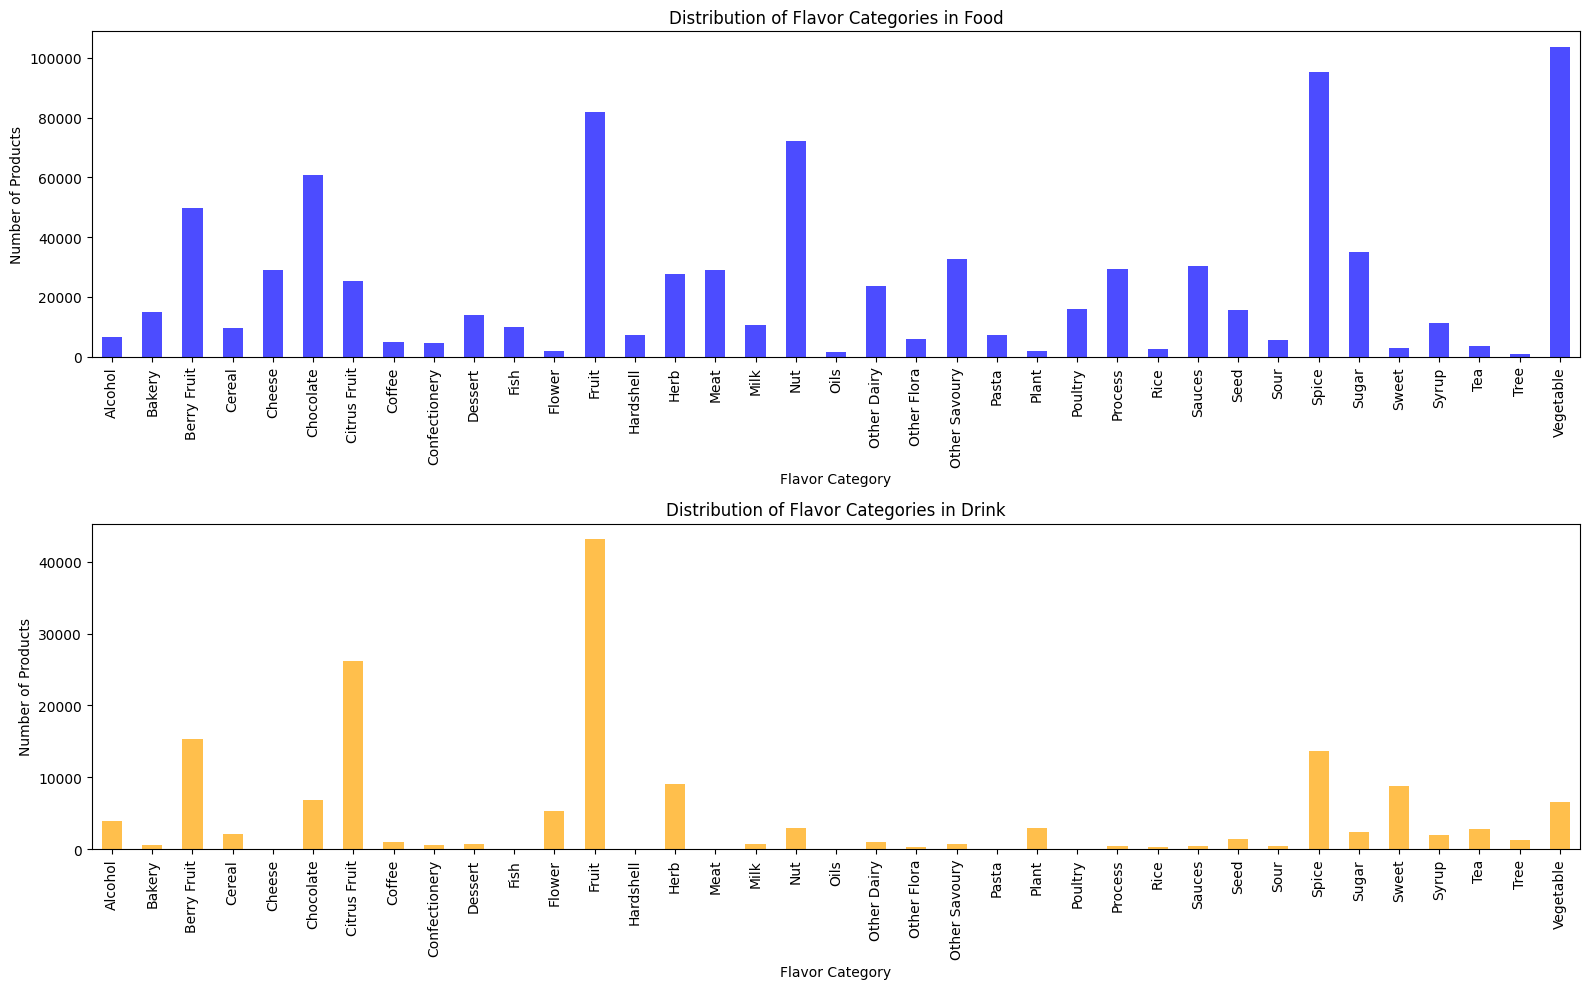

In [12]:
import matplotlib.pyplot as plt

# Group by flavor category and count the occurrences for Food
food_flavor_counts = f_merged[f_merged['supercat'] == 'Food'].groupby('f_cat')['p_id'].count().sort_values(ascending=False)

# Group by flavor category and count the occurrences for Drink
drink_flavor_counts = f_merged[f_merged['supercat'] == 'Drink'].groupby('f_cat')['p_id'].count().sort_values(ascending=False)

# Ensure the same category order
categories = food_flavor_counts.index.union(drink_flavor_counts.index)

# Plot the distribution of flavor categories in Food and Drink in one row
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Plot the distribution of flavor categories in Food
food_flavor_counts.reindex(categories).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribution of Flavor Categories in Food')
axes[0].set_xlabel('Flavor Category')
axes[0].set_ylabel('Number of Products')
axes[0].tick_params(axis='x', rotation=90)

# Plot the distribution of flavor categories in Drink
drink_flavor_counts.reindex(categories).plot(kind='bar', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Distribution of Flavor Categories in Drink')
axes[1].set_xlabel('Flavor Category')
axes[1].set_ylabel('Number of Products')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## num_product by f_cat based for each product cat 

In [13]:
import plotly.express as px
import plotly.graph_objects as go

# Define Color Palette
palette = px.colors.qualitative.Pastel
color_mapping = {f_cat: palette[i % len(palette)] for i, f_cat in enumerate(f_merged['f_cat'].unique())}
# Group Data
grouped_data = f_merged.groupby(['supercat', 'cat', 'f_cat'])['p_id'].nunique().reset_index()

# Filter the data for supercat 'Drink'
drink_data = f_merged[f_merged['supercat'] == 'Drink']

# Group by cat and f_cat, and count the occurrences
drink_cat_flavor_counts = drink_data.groupby(['cat', 'f_cat'])['p_id'].count().unstack().fillna(0)

# Create an interactive plot using Plotly
fig = go.Figure()

for cat in drink_cat_flavor_counts.index:
    fig.add_trace(go.Bar(
        x=drink_cat_flavor_counts.columns,
        y=drink_cat_flavor_counts.loc[cat],
        name=cat,
        marker_color=[color_mapping[f_cat] for f_cat in drink_cat_flavor_counts.columns]
    ))

fig.update_layout(
    title='Distribution of Flavor Categories for Each Drink Category',
    xaxis_title='Flavor Category',
    yaxis_title='Count',
    barmode='stack'
)

fig.show()

In [14]:
# Filter Data for 'Drink' Supercategory
# Filter the data for supercat 'Drink'
food_data = f_merged[f_merged['supercat'] == 'Food']

# Group by cat and f_cat, and count the occurrences
food_cat_flavor_counts = food_data.groupby(['cat', 'f_cat'])['p_id'].count().unstack().fillna(0)

# Create an interactive plot using Plotly
fig = go.Figure()

for cat in food_cat_flavor_counts.index:
    fig.add_trace(go.Bar(
        x=food_cat_flavor_counts.columns,
        y=food_cat_flavor_counts.loc[cat],
        name=cat,
        marker_color=[color_mapping[f_cat] for f_cat in food_cat_flavor_counts.columns]
    ))

fig.update_layout(
    title='Distribution of Flavor Categories for Each Food Category',
    xaxis_title='Flavor Category',
    yaxis_title='Count',
    barmode='stack'
)

fig.show()

## num_prod by f_cat for each country

In [15]:
drink_data = f_merged[f_merged['supercat'] == 'Drink']

# Group by cat and f_cat, and count the occurrences
drink_cn_flavor_counts = drink_data.groupby(['c_id', 'f_cat'])['p_id'].count().unstack().fillna(0)

# Create an interactive plot using Plotly
fig = go.Figure()

for c_id in drink_cn_flavor_counts.index:
    fig.add_trace(go.Bar(
        x=drink_cn_flavor_counts.columns,
        y=drink_cn_flavor_counts.loc[c_id],
        name=c_id,
        marker_color=[color_mapping[f_cat] for f_cat in drink_cn_flavor_counts.columns]
    ))

fig.update_layout(
    title='Distribution of Flavor Categories for Each Country',
    xaxis_title='Flavor Category',
    yaxis_title='Count',
    barmode='stack'
)

fig.show()

## num_prod by f_cat for each year_month

In [16]:
f_merged['year'] = f_merged['date'].dt.year
drink_data = f_merged[f_merged['supercat'] == 'Drink']

# Group by year and f_cat, and count the occurrences
drink_year_flavor_counts = drink_data.groupby(['year', 'f_cat'])['p_id'].count().unstack().fillna(0)

# Create an interactive plot using Plotly
fig = go.Figure()

for f_cat in drink_year_flavor_counts.columns:
    fig.add_trace(go.Line(
        x=drink_year_flavor_counts.index,
        y=drink_year_flavor_counts[f_cat],
        name=f_cat,
        marker_color=color_mapping[f_cat]
    ))

fig.update_layout(
    title='Distribution of Flavor Categories for Each Year',
    xaxis_title='Year',
    yaxis_title='Count',
    barmode='stack'
)

fig.show()

c:\Users\voqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [18]:
f_merged

,p_id,b_n,f_id,f_cat,c_id,supercat,cat,sub,date,month,name,region,year
0,5472359,1,206,Citrus Fruit,BR,Drink,RTDs,RTD (Iced) Tea,2015-12-09,12,Brazil,Latin America,2015
1,11805033,1,1255,Other Dairy,JP,Food,Bakery,"Cakes, Pastries & Sweet Goods",2019-12-19,12,Japan,Asia Pacific,2019
2,13026795,1,8375,Other Savoury,FR,Food,Meals & Meal Centers,Instant Noodles,2020-09-22,9,France,Europe,2020
3,11419655,1,29,Berry Fruit,GB,Food,Baby Food,"Baby Fruit Products, Desserts & Yogurts",2019-09-10,9,UK,Europe,2019
4,9911203,1,370,Sugar,DE,Food,Desserts & Ice Cream,"Water Based Ice Lollies, Pops & Sorbets",2019-04-25,4,Germany,Europe,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16637428,1,303,Nut,CN,Food,Bakery,"Cakes, Pastries & Sweet Goods",2023-11-24,11,China,Asia Pacific,2023
1048571,14448936,1,303,Nut,JO,Food,Sugar & Gum Confectionery,Other Sugar Confectionery,2021-12-16,12,Jordan,Middle East & Africa,2021
1048572,5348093,1,291,Vegetable,CA,Food,"Processed Fish, Meat & Egg Products",Fish Products,2015-11-03,11,Canada,North America,2015
1048573,13431643,1,146,Other Dairy,BG,Drink,Alcoholic Beverages,Liqueur,2021-02-03,2,Bulgaria,Europe,2021


In [17]:
f_merged.to_pickle('f_merged.pkl')

In [30]:
drink_data

,p_id,b_n,f_id,f_cat,c_id,supercat,cat,sub,date,month,name,region,year,year_month
0,5472359,1,206,Citrus Fruit,BR,Drink,RTDs,RTD (Iced) Tea,2015-12-09,12,Brazil,Latin America,2015,2015-12
7,7681219,1,118,Nut,PL,Drink,Nutritional Drinks & Other Beverages,Nutritional & Meal Replacement Drinks,2017-08-10,8,Poland,Europe,2017,2017-08
29,15876544,1,262,Citrus Fruit,BR,Drink,Juice Drinks,Juice,2023-03-24,3,Brazil,Latin America,2023,2023-03
33,7155991,1,397,Fruit,PH,Drink,Juice Drinks,Nectars,2017-03-08,3,Philippines,Asia Pacific,2017,2017-03
52,8698531,1,206,Citrus Fruit,AU,Drink,RTDs,RTD (Iced) Tea,2018-05-17,5,Australia,Asia Pacific,2018,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,7521387,1,280,Fruit,CN,Drink,Carbonated Soft Drinks,Carbonated Soft Drinks,2017-06-26,6,China,Asia Pacific,2017,2017-06
1048566,13319639,1,339,Flower,CN,Drink,Hot Beverages,Tea,2020-12-15,12,China,Asia Pacific,2020,2020-12
1048568,14924970,3,225,Fruit,US,Drink,Alcoholic Beverages,Flavoured Alcoholic Beverages,2022-05-26,5,USA,North America,2022,2022-05
1048573,13431643,1,146,Other Dairy,BG,Drink,Alcoholic Beverages,Liqueur,2021-02-03,2,Bulgaria,Europe,2021,2021-02
